#                             INVESTIGATING A DATA SET 

#                                        Titanic Dataset
I will investigate what factors included in the dataset that could have contributed to the survival of the passengers
i will look at factors that could have determined if being a member of a certain group would increase the chances of survival.
the questions I will try to answer will cover the following
1. Did the gender of the passenger indicate a higher chance of survival?
2. Did the class that the passengers were in indicate a higher chance of survival?
3. Did other factors like the embarkment port or age have any influence on survival rates?

First I get the dataset provided and preview it.

# Data Wrangling

In [1]:
#get the imports needed and load data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [2]:
#load and display a sample of survivors data 
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#a glance at the details of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#details of the dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analyzing Data

## Passenger Gender

To begin here by a display of the total number of passengers broken down by gender

In [5]:
#a display of total pasangers by gender
men_total = titanic_df[titanic_df.Sex == 'male']
women_total = titanic_df[titanic_df.Sex == 'female']

#print (totals_by_sex)
print("Total Males: ")
print(men_total.count()['Sex'])
print("Total Females: ")
print(women_total.count()['Sex'])

Total Males: 
577
Total Females: 
314


From the numbers, it looks like almost two thirds of the passengers were men while about slightly over a third were female, I will visualize these details on a pie chart 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFA2F98>], dtype=object)

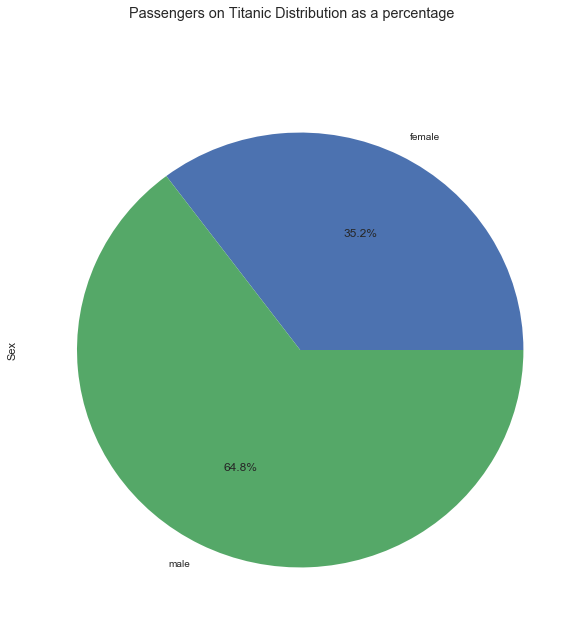

In [6]:
#visualize the numbers by gender on a pie chart
number_by_sex =titanic_df.groupby('Sex')['Sex'].count()
number_by_sex.plot.pie(subplots=True,
                    figsize=(10, 10),   
                    autopct='%1.1f%%',
                    title='Passengers on Titanic Distribution as a percentage')

Having established that 65 percent  and 35 percent represent males and female respectively, I will display the numbers and percentages  of the total passengers that survived and then  members of each gender and compare them.how did gender contribute to survival?

## Survival Status

survived or Died
Died        549
survived    342
Name: survived or Died, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C051CF8>], dtype=object)

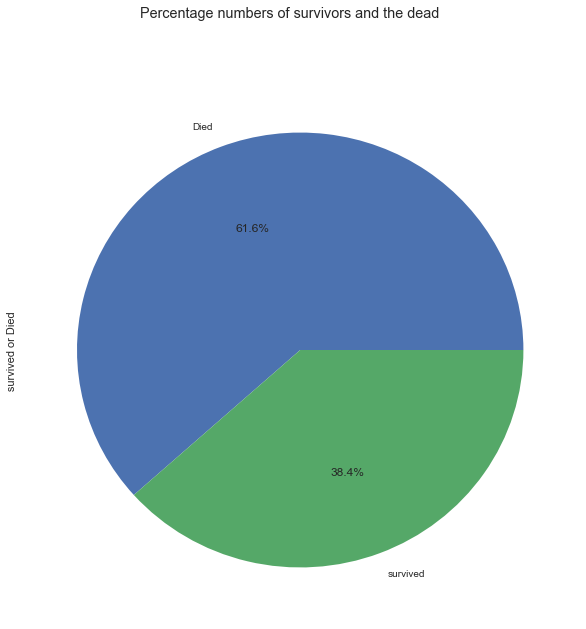

In [7]:
# To include a column  'survived or Died' to replace  0 and 1 )
survival = {0: 'Died', 1: 'survived'}
titanic_df['survived or Died'] = titanic_df['Survived'].map(survival)
#display total number of survivors male or female
total_survivors = titanic_df.groupby('survived or Died')['survived or Died'].count()
print (total_survivors)
#show percentages of survivors compared to the dead
total_survivors.plot.pie(subplots=True,
                    figsize=(10, 10),      
                    autopct='%1.1f%%',   
                    title='Percentage numbers of survivors and the dead ')

From the above numbers and visuals, we see that close to 62% of the passengers died while about 38% survived, this represents the total dataset, so i will break the numbers down more into categories and investigate them.

## Survival By Gender

                  Male  Female
survived or Died              
Died               468      81
survived           109     233


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3A0898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4E97B8>], dtype=object)

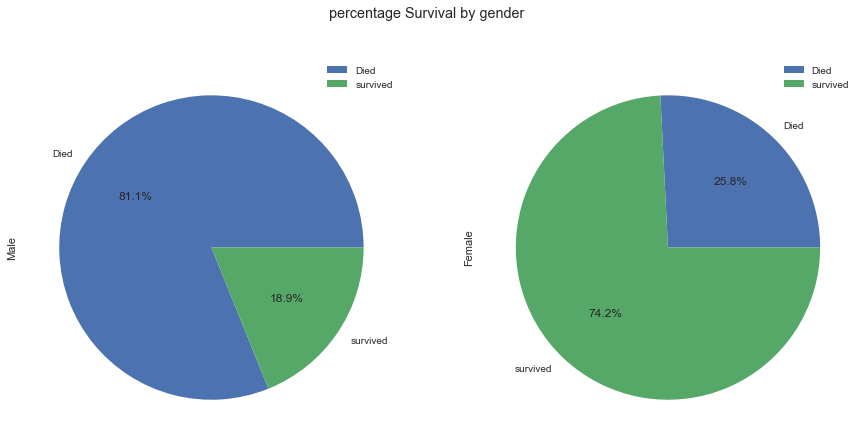

In [8]:
#calculte survivors by gender

survived_male = titanic_df[titanic_df['Sex']=='male'].groupby('survived or Died')['survived or Died'].count()
survived_female = titanic_df[titanic_df['Sex']=='female'].groupby('survived or Died')['survived or Died'].count()
survival_by_gender = pd.concat([survived_male,survived_female], axis=1, keys=['Male','Female'])
print(survival_by_gender)

survival_by_gender.plot.pie(subplots=True,
                         figsize=(15, 7),
                         autopct='%.1f%%',  
                         title='percentage Survival by gender')

From the above numbers and visuals we can see that although 2/3 of the total passengers were male and 1/3 were female, the figures for survival tell a different story, while close to 3/4 of the female passengers survived, only less than 20% of the male passengers survived. another factor that might have contributed to such a big gap in males' and females' survival rates is the class they were in, so i will investigate what class the passengers was in and see if female passengers were in a specific class that resulted in their higher survival rates

## Passengers By Class

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1187B8>], dtype=object)

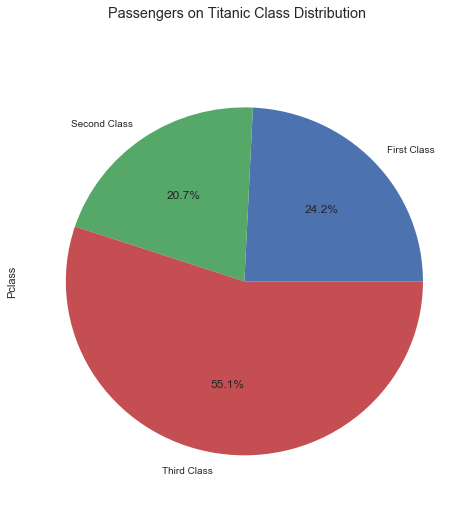

In [9]:
#display survivors by class
figs_by_class = titanic_df.groupby('Pclass')['Pclass'].count()
print(figs_by_class)
figs_by_class.plot.pie(subplots=True,
                      figsize=(8, 8),
                      autopct='%.1f%%',
                      title='Passengers on Titanic Class Distribution',
                      labels = ['First Class', 'Second Class', 'Third Class'])

From the display we can see that the majority of passengers (over 55 percent) were in 3rd class,  Here we explore the number of each gender in every class to see if there was any correlation of being a specific gender and being in a particular class 

## Passengers By Gender And Class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C703668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009EF4198>], dtype=object)

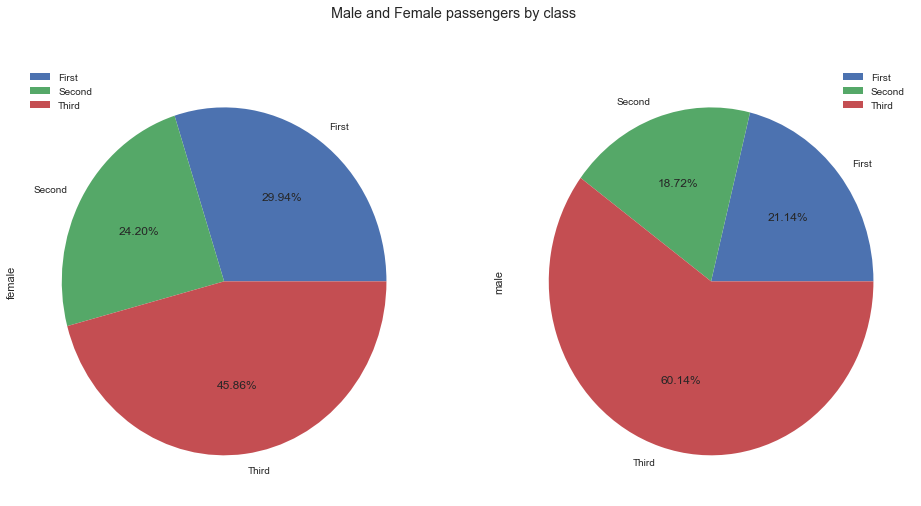

In [11]:
#categorize by gender and class

female_by_class = titanic_df[titanic_df['Sex'] == 'female'].groupby(['Pclass'])['Pclass'].count()
male_by_class = titanic_df[titanic_df['Sex'] == 'male'].groupby(['Pclass'])['Pclass'].count()

#concat the males and females to compare by class 
gender_and_class = pd.concat([female_by_class, male_by_class], axis=1, keys=['female','male'])

#pie chart visual 
gender_and_class.plot.pie(subplots=True,
                    figsize=(16, 8),
                    autopct='%.2f%%',
                    title='Male and Female passengers by class',
                    labels = ['First', 'Second', 'Third'])

we observe here that the third class had more people of either gender and there were also more males in the third class than females. so although we cannot ultimately conclude that class had everything to do with survival rates, from the information here here we can give a hypothesis that being in a higher class might have increased the chance of survival especially if a passenger  was female

## Survivors And Non Survivors

Survived  Deceased  Survived
Pclass                      
1               80       136
2               97        87
3              372       119


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D2EC898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D49DBE0>], dtype=object)

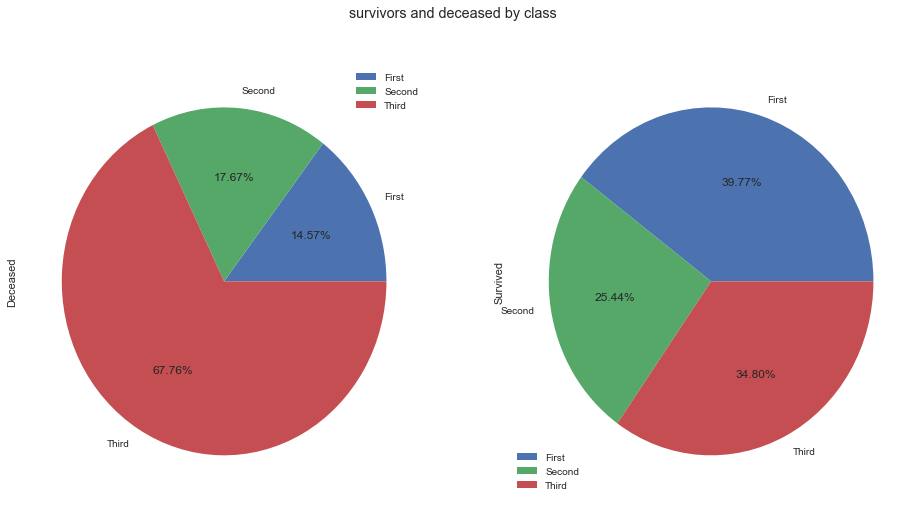

In [12]:
#obtain and use the unstack funtion to display survivors
survivors_info=titanic_df.groupby(['Pclass','Survived']).size().unstack().rename(columns = {0:'Deceased', 1:'Survived'})
print(survivors_info)
survivors_info.plot.pie(subplots=True,
                   figsize=(16, 8),
                   autopct='%.2f%%',
                   title='survivors and deceased by class',
                   labels = ['First', 'Second', 'Third'])

The above visual does confirm that passengers in the first class indeed were very likely to survive, despite only having 24% of total passengers, close to 40% of them survived, the proportion of second class that survived to the total number of passengers is closer at about 25% and 21%. The figures for the third class however show a big spread, about 35% survival rate compared to a 55% occupancy.
next heres a look at passenger numbers based on the three embarkment ports and various classes

## Embarked By Class and Survival

The embarked dataset has some missing figures. i will use the dropna function to drop the missing data, i will visualize the remaining data by embarkment port. 

In [14]:
#get embarked port information
titanic_df['Embarked'].dropna().size

889

The 889 value has 2 values missing from the total of 891 in the dataset, since 2 values will have minimal impact on the figures shown by the visual.

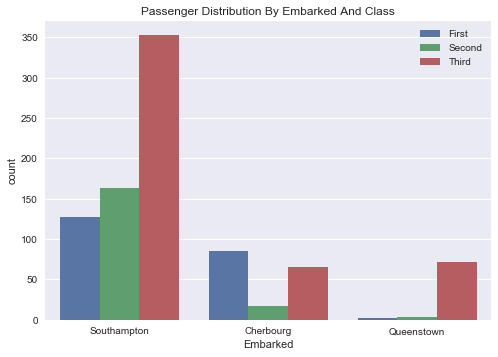

In [15]:
#display embarked by class
ax=sns.countplot(x="Embarked",hue='Pclass',data=titanic_df)
ax.set(title='Passenger Distribution By Embarked And Class',
       xticklabels=['Southampton','Cherbourg','Queenstown'])
ax.legend(['First','Second','Third'],title = '')

The embarkment ports distribution in various classes show that the highest number of passengers were from S(Southampton) in all classes, moderate in C(Cherbourg) for all classes but very high for first class passengers while the Q(Queenstown) has the almost all passengers in third class.

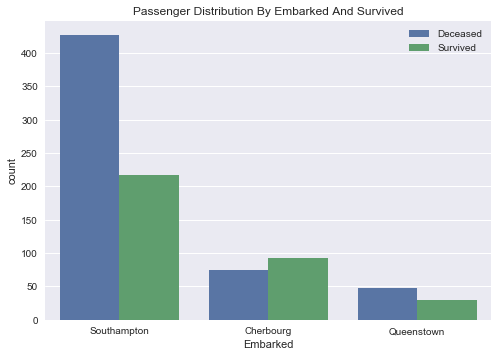

In [16]:
#display survival numbers by embarkment port
ax=sns.countplot(x="Embarked",hue='Survived',data=titanic_df)
ax.set(title='Passenger Distribution By Embarked And Survived',
       xticklabels=['Southampton','Cherbourg','Queenstown'])
ax.legend(['Deceased','Survived'],title = '')


The survival rates match the number passengers embarking at each port, the higher the number of passengers the higher the survivors
The factors that contributed to this numbers from the various ports are beyond this investigation, there would have to be  a further investigation of the factors that contributed to the number of passengers, but for the purpose of this investigation, there is no apparent relationship or correlation between the embarkement ports and survival rates

## Age Factor

Another factor we can consider is age, however there are alot of data missing from the age column as shown below

In [18]:
#drop missing age numbers
drop_age = titanic_df['Age'].dropna().size
print(drop_age)

714


Only 714 of the ages out of the total 891 entries is available, i used the dropn/a function to drop the missing figures and present the remaining data available for analysis

survived or Died
Died        69
survived    70
Name: survived or Died, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9357F0>], dtype=object)

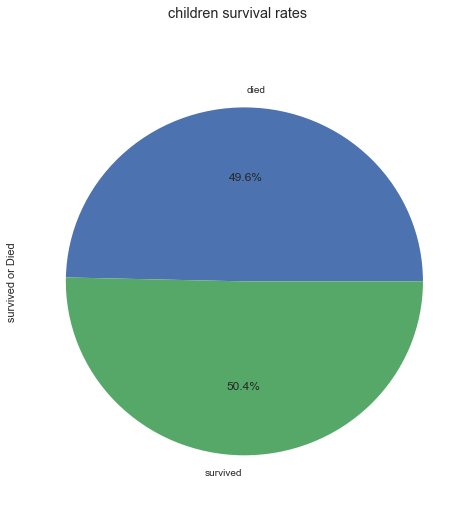

In [19]:
#assumption is that 18 is the cut off age for adults, display children survivors
children_survivors= titanic_df[titanic_df['Age'] <=18].groupby('survived or Died')['survived or Died'].count()
print(children_survivors)
children_survivors.plot.pie(subplots=True,
                    figsize=(8, 8),
                    autopct='%.1f%%',
                    title='children survival rates',
                    labels = ['died', 'survived'])

It looks like children 18 and under had higher survival rates than men which stood at only 19%, while not as high as those for women at over 75%, I can conclude female passengers and children seem to have been given preference for rescue thus a higher chance of survival. 

# Conclusion

I will revisit the questions i had raised at the beginning and see if i was at all able to come up with some conclusions
1. Did the gender of the passenger indicate a higher chance of survival?
From the data and visuals i can conclude that indeed the gender of the passenger played a role in survivoal, female passengers who were only about 35% of the total sample had a close to  75% survival rate compared to male passengers who were about 65% of the sample and recorded a mere 19% of survival rate.
2. Did the class that the passengers were in indicate a higher chance of survival?
Passengers in first class who represented a 24% of the sample had a survival rate of close to 40% while for about 55% of the third class passengers the recorded a survival rate of only abot 35%. 

3. Did other factors like the embarkment port or age have any influence on survival rates?
There are 177 missing values in the age column, this is a large number considering the sample size,  I however used the dropn/a function to drop the missing numbers and visualized the available data which puts children 18 and under at a 50/50 chance of survival.
4.As for embarkment ports, the only 2 missing numbers were dropped and the remaining numbers were visualized. However  there is no relationship noted between the port of embarkment and survival rates, the survival rate was spread out in no relatable way to the port of embarkement. 

Gender, age and social class seem to be the main factors of high rates of survival, first class passengers, younger passengers and women were given priority in the rescue while men were given the least priority.
There mays be factors that affected survival rates that i did not explore in this investigation
The conclusion is solely based on the factors that i considered.

Resources used for reference

Bay area bike share project
http://www.icyousee.org/titanic.html
https://en.wikivoyage.org/wiki/RMS_Titanic
https://plot.ly/python/pie-charts/
https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/
